## Visual Computing in the Life Sciences

Assignment Sheet 1

### Group member: Dingming Liu, Faiza Khurshid, Danqi Wang

### Exercise 1 (Convolution-based Image Filtering, 7 Points)

#### a) Assume a 15 × 15 convolution kernel (k1), where all non-diagonal elements are set to zero, and on the diagonal to 15 1 . What eﬀect does this ﬁlter have? (1P)

Answer: To make the picture Picture moving from top left to bottom right.

#### b) Assume another 15 × 15 convolution kernel (k2), with all the elements being zero everywhere, except the elements on the 8th row (if we start counting at one) are set to 15 1 . What is the eﬀect of this ﬁlter? (1P)

Answer: Makes the picture looks like moving horizontally.

#### c) Brieﬂy explain what is the diﬀerence between applying both ﬁlters k1 and k2 on the image using diﬀerent orders, i.e., once apply k1 ﬁrst and then k2, and once k2 ﬁrst and then k1? (2P)

Answer: Applying k1 first than k2 is smoother than first apply k2.

#### d) Is applying both ﬁlters k1 and k2 on the image, with k1 ﬁrst and then k2, the same as applying a 15 × 15 kernel, with all elements set to zero except the elements on the diagonal and on the 8th row that are set to 15 1 ? If yes, brieﬂy explain why. If no, then what is the equivalent ﬁlter for applying k1 and k2? (3P)

Answer: The results are different. Applying k1 and k2 one by one computes center pixel * 1/15 twice, mybe change the center element of the kernel described in the question to 1/225 is the equivalent kernel.

### Exercise 2 (Separable Filters, 20 Points)

Applying a convolutional ﬁlter to a two-dimensional image generally requires computing a two-dimensional convolution. If a 2D kernel is separable, it can be decomposed into a product of two 1D kernels which can be applied one after the other.



a) Given a discrete 2D image of size m × n and a square convolution kernel of edge length l = 2k + 1, how many multiplications are involved in computing a (padded) convolution? How many multiplications are required when the kernel is separable, and we obtain the same result via a sequence of two 1D convolutions? What is the minimum kernel radius k at which exploiting separability starts paying oﬀ in terms of the number of multiplications? (3P)

#### Answer: 
1. there will be m*n*(2k+1)*(2k+1) multiplications since when the kernel roll along the image, each pixel needs to multiply with coefficient in the kernel.
2. there will be 2*m*n*(2k+1) multiplications totally. 
when the image matrix firstly multiply with one column vector, needs m*n*(2k+1) times to get the intermediate output, and another n*m*(2k+1) multiplications for multipying with row vector.
3. In order to make separable kernel efficiency, then 2*m*n*(2k+1) < m*n*(2k+1)*(2k+1), which means k>0.5. And the minimum of k is 1. The minimum kernel radius is 2k+1 =3.

b) Not all 2D convolution ﬁlters are separable. We will now verify that, given a discrete 2D ﬁlter, we can check whether it is separable by checking the rank of the corresponding ﬁlter matrix. For this, assume that two discrete 1D kernels h x and h y are given as column vectors. Based on the deﬁnition of the discrete 2D convolution

k k (g ∗ h)(i, j) = ∑ ∑ g(u, v)h(i u, j v) u=−k v=−k

argue that convolving g with h x in x direction and with h y in y direction yields an equivalent result as a 2D convolution with a rank-1 ﬁlter h = h y h x T . Does it matter whether we ﬁrst convolve along the x direction and then along y, or vice versa? Why? (5P) Hint: You may use all facts about convolutions that were discussed in the lecture.

#### Answer:
Convolving with hx and hy is equivalent to 2D convolution. And the order of convolving with hx and hy does not matter since convolution is associative and commutative.

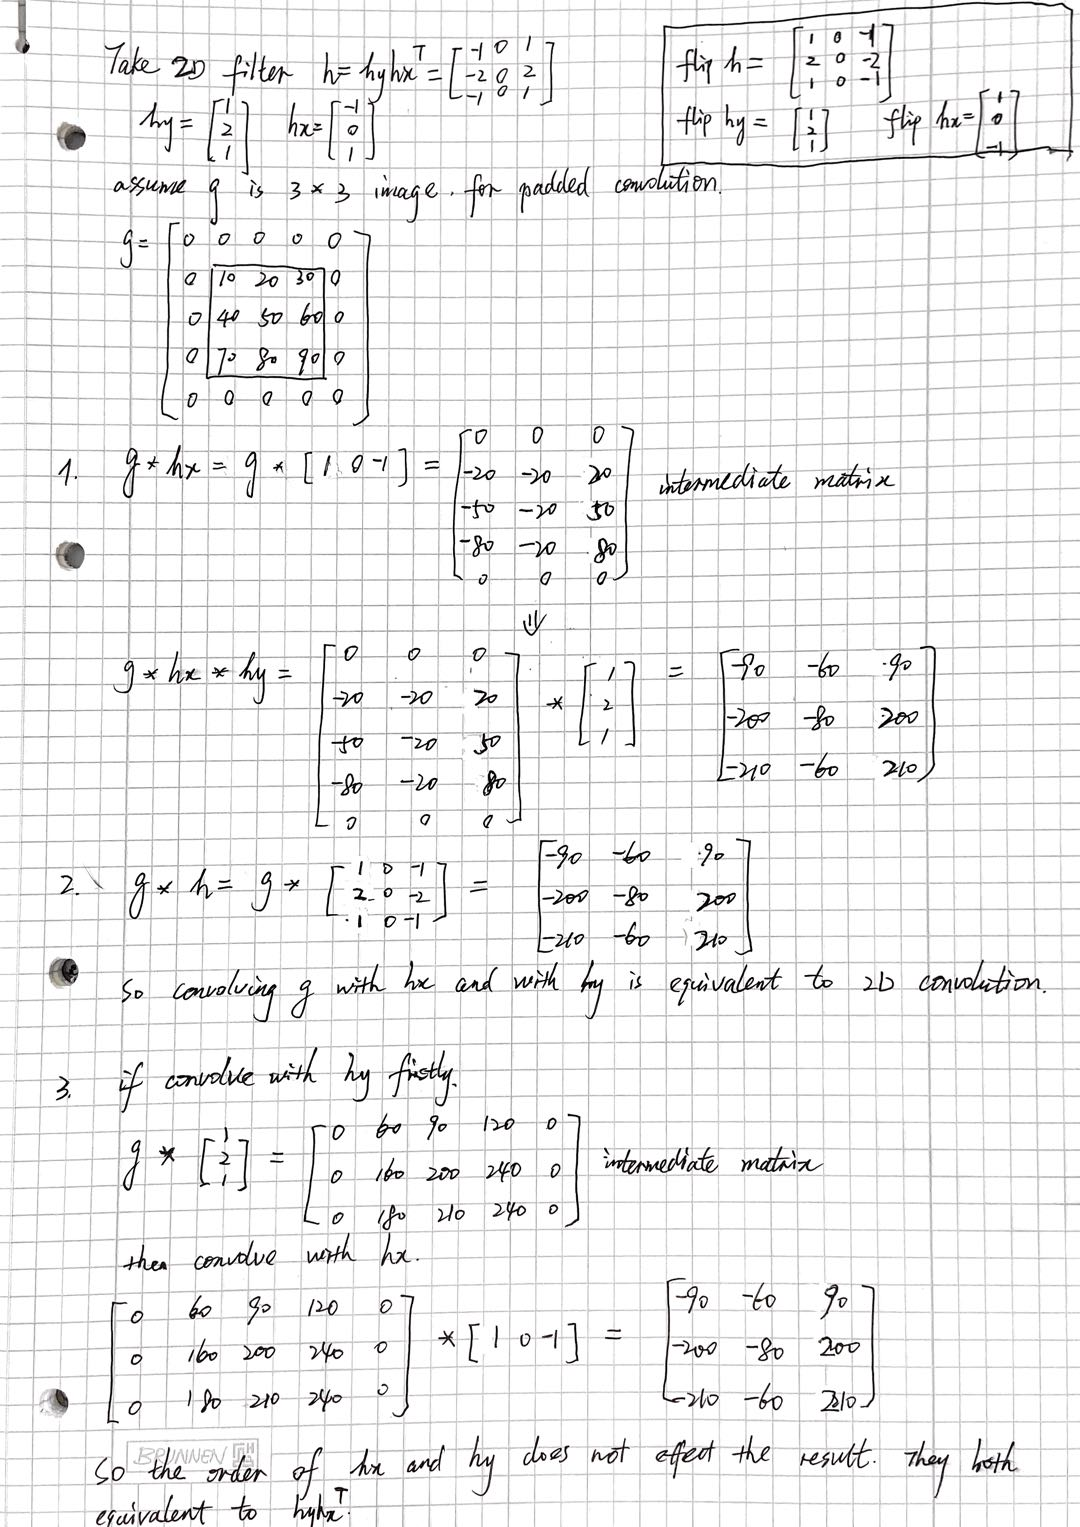

c) Based on the insight from b), implement a function in Python that checks whether a given 2D ﬁlter is separable. If it is, compute the corresponding 1D ﬁlters h x and x y (make it clear which one is which). Is the factorization into h x and x y unique? Why? (5P) Hint: Remember the Singular Value Decomposition.

#### Answer:
We can see if the rank of given 2D kernel matrix equals one, then it is separable.

In [55]:
import numpy as np

def is_separable(matrix):
    a = np.linalg.matrix_rank(matrix)
    if a == 1:
        print('{}is separable.'.format(matrix))
    else:
        print('{}is not separable.'.format(matrix))


In [60]:
matrix_test = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
is_separable(matrix_test)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]is separable.


In [123]:
def get_1D_filter(matrix):
    ''' use SVD to get U,E,V matrix. 
        use the dot product from the first column vector of U and the first row vector of V,
        then multiply with the first singular value in diagonal matrix, we can get the original 2D filter
    '''
    u,e,v = np.linalg.svd(matrix)
    hy = e[0] * np.array(u[:,0]).reshape(-1,1) #the column vector from orthonomal matrix u
    hx = np.array(v[0,:]).reshape(1,-1) #the row vector from orthonomal matrix v
    
    print('hy: {}'.format(hy),'\n\n','hx:{}'.format(hx,'\n'))
    
    print('reconstruct the orginal 2D filter{}:'.format(hy * hx),'\n')
    
    # check if the factorization if unique.
    hy_ = e[1] * np.array(u[:,1]).reshape(-1,1) #the second column vector from orthonomal matrix u
    hx_ = np.array(v[1,:]) #the second row vector from orthonomal matrix v
    print(hy_ * hx_)
    
get_1D_filter(matrix_test)

hy: [[-1.41421356]
 [-2.82842712]
 [-1.41421356]] 

 hx:[[ 0.70710678  0.         -0.70710678]]
reconstruct the orginal 2D filter[[-1. -0.  1.]
 [-2. -0.  2.]
 [-1. -0.  1.]]: 

[[ 2.80449349e-16  0.00000000e+00  2.80449349e-16]
 [-1.12179740e-16 -0.00000000e+00 -1.12179740e-16]
 [-5.60898698e-17 -0.00000000e+00 -5.60898698e-17]]


##### Conclusion:
Based on the above test, the factorization of hx and hy is unique. They are the first column and row vector in U and V separately, and multiply with the first singular value to construct the orignal 2D filter. For the other columns, we cannot generate the original 2D filter.

d) Which of the following three ﬁlters are separable?
You may use your code from c) to ﬁnd out. Apply each of the ﬁlters to the image brainnoisy.png available on eCampus, using the function filters.convolve from scipy. Note that you have to convert its intensity values to ﬂoating point to achieve the expected result. For those ﬁlters that are separable, also apply the corresponding one-dimensional ﬁlters, using the function filters.convolve1d. Visualize the results, and the diﬀerence between them. Can you see a diﬀerence? (4P)

In [137]:
# use the function in c) to check the following filters.
kernel_1 = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
kernel_2 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
kernel_3 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

is_separable(kernel_1)
is_separable(kernel_2)
is_separable(kernel_3)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]is separable.
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]is not separable.
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]is separable.


So the first and third kernels are separable.

(145, 145)


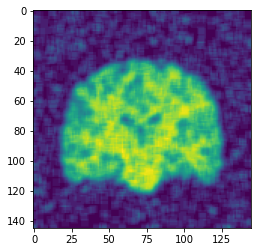

In [141]:
from PIL import Image
from scipy import ndimage
from scipy.ndimage.filters import convolve1d
import matplotlib.pyplot as plt

img = np.array(Image.open('/Users/wangdanqi/Desktop/brain-noisy.png'), dtype=float)
print(img.shape)
result_1 = ndimage.convolve(img, kernel_1)
plt.imshow(result_1)


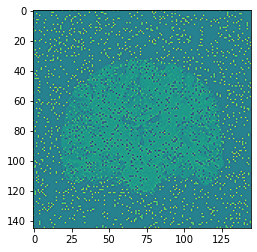

In [142]:
result_2 = ndimage.convolve(img, kernel_2)
plt.imshow(result_2)

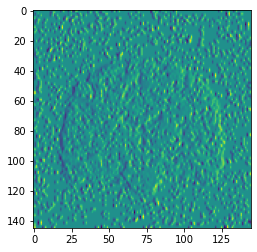

In [143]:
result_3 = ndimage.convolve(img, kernel_3)
plt.imshow(result_3)

In [148]:
get_1D_filter(kernel_1)

hy: [[-2.23606798]
 [-2.23606798]
 [-2.23606798]
 [-2.23606798]
 [-2.23606798]] 

 hx:[[-0.4472136 -0.4472136 -0.4472136 -0.4472136 -0.4472136]]
reconstruct the orginal 2D filter[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]: 

[[ 8.32490903e-17 -2.08122726e-17 -2.08122726e-17 -2.08122726e-17
  -2.08122726e-17]
 [-2.08122726e-17  5.20306815e-18  5.20306815e-18  5.20306815e-18
   5.20306815e-18]
 [-2.08122726e-17  5.20306815e-18  5.20306815e-18  5.20306815e-18
   5.20306815e-18]
 [-2.08122726e-17  5.20306815e-18  5.20306815e-18  5.20306815e-18
   5.20306815e-18]
 [-2.08122726e-17  5.20306815e-18  5.20306815e-18  5.20306815e-18
   5.20306815e-18]]


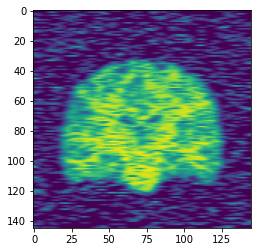

In [155]:
#for kernel 1: 1D convolution
a = convolve1d(img, weights = [-2.23606798, -2.23606798, -2.23606798, -2.23606798, -2.23606798])
b = convolve1d(a,weights = [-0.4472136, -0.4472136, -0.4472136, -0.4472136, -0.4472136])
plt.imshow(b)

In [152]:
get_1D_filter(kernel_3)

hy: [[-1.41421356]
 [-2.82842712]
 [-1.41421356]] 

 hx:[[ 0.70710678  0.         -0.70710678]]
reconstruct the orginal 2D filter[[-1. -0.  1.]
 [-2. -0.  2.]
 [-1. -0.  1.]]: 

[[ 2.80449349e-16  0.00000000e+00  2.80449349e-16]
 [-1.12179740e-16 -0.00000000e+00 -1.12179740e-16]
 [-5.60898698e-17 -0.00000000e+00 -5.60898698e-17]]


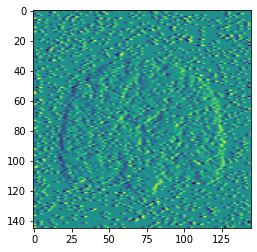

In [153]:
#for kernel 3: 1D convolution
c = convolve1d(img, weights = [-1.41421356, -2.82842712, -1.41421356]) 
d = convolve1d(c, weights = [0.70710678, 0, -0.70710678])
plt.imshow(d)

For those 1D convolution from separable kernel, there are some differences between the 2D convolutions

e) In the experiment above, do you expect the two 1D convolutions or the single 2D convolution to be computationally more eﬃcient? Why? Measure the corresponding times in your implementation. Did the measurement agree with your expectation? What should happen to the diﬀerence for larger kernels? (3P)

#### Answer:
Two 1D convolutions is more efficient.because the multiplication times of 1D convolution are fewer than 2D convolution.
For larger kernels, the multiplication times would be increasing dramatically, and reduce the working efficiency.

### Exercise 3 (Median Filters, 20 Points)

In this exercise, you will learn about a nonlinear image ﬁlter, the median ﬁlter, and compare it to a linear ﬁlter that we learned about in the lecture.

a) Read in the image brain.png, which is available on eCampus, and add salt-and-pepper noise to it by turning 5000 pixels (selected uniformly at random, with replacement), to black or to white (also at random). (2P)

(145, 145)


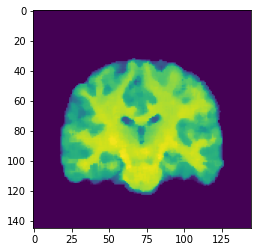

In [170]:
img_3 = np.array(Image.open('/Users/wangdanqi/Desktop/brain.png'), dtype=float)
print(img_3.shape)
plt.imshow(img_3)


### Exercise 4 (Cluster Detection, 15 Points)

The microscopy image in Fig. 1 is available as clusters.png from eCampus. The bright spots are protein clusters in a cell membrane. Automatically counting such clusters is a typical image analysis task. Within this exercise, you will implement a pipeline that approaches this task with a combination of three basic image processing operations: local-maximum detection, smoothing, and thresholding.

#### a) Brieﬂy explain the role of each operation in this task. (2P)

• local-maximum operation will use to detects cluster centers
• smoothing will connects clusters which are very close to each other.
• thresholding operation can use to separate meaningful data from the background noise.

#### b) What would be the logical order to do these operations? Does swapping the order of thresholding and image smoothing make a diﬀerence? Why? (3P)

logical order: 1. Smoothing 2. Thresholding 3. Local-maximum detection
Yes, swapping the order of thresholding and smoothing makes difference. If we swap the order
of thresholding and image smoothing, then many of the background noise pixels will become
brighter due to averaging protein clusters pixels nearby. As the result, thresholding will not be
able to separate that background noise from the actual protein clusters. Therefore, local-maximum
detection will detect much more false clusters.

#### c) Write a function that reads in the image, performs the three operations in a suitable order, and outputs an estimate of the number of clusters. (4P) Hint: We recommend using the library functions available within the Python package scikit image, especially its local maxima based peak extraction.

Number of protein clusters: 955


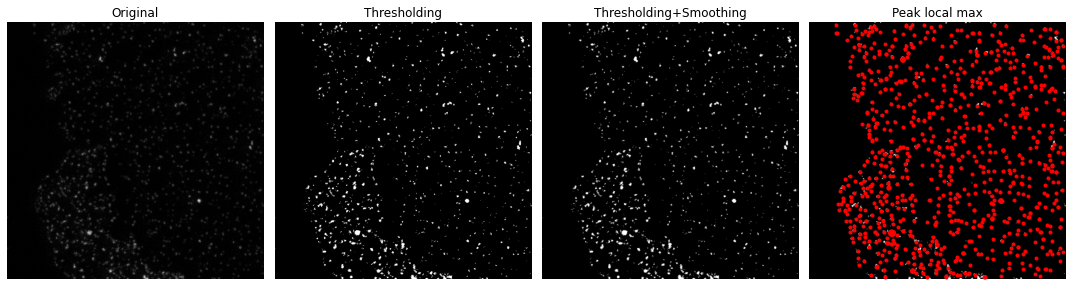

In [177]:
import skimage
from skimage import io
from skimage import filters
from skimage import feature
import matplotlib.pyplot as plt
def count_clusters(original_image, threshold, sigma, min_distance):
    im = original_image
#thresholding
    im_t = im > skimage.filters.threshold_otsu(im, nbins=threshold)
# smoothing
    im_ts = skimage.filters.gaussian(im_t, sigma=sigma)
# Comparison between image_max and im to find the coordinates of local maxima
    coordinates = skimage.feature.peak_local_max(im_ts,min_distance=min_distance)
    print("Number of protein clusters:", coordinates.shape[0])
# display results
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    ax[0].imshow(original_image, cmap=plt.cm.gray)
    ax[0].axis('off')
    ax[0].set_title('Original')
    ax[1].imshow(im_t, cmap=plt.cm.gray)
    ax[1].axis('off')
    ax[1].set_title('Thresholding')
    ax[2].imshow(im_ts, cmap=plt.cm.gray)
    ax[2].axis('off')
    ax[2].set_title('Thresholding+Smoothing')
    ax[3].imshow(im_ts, cmap=plt.cm.gray)
    ax[3].autoscale(False)
    ax[3].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
    ax[3].axis('off')
    ax[3].set_title('Peak local max')
    fig.tight_layout()
    plt.show()
original_image = skimage.img_as_float(skimage.io.imread('/Users/wangdanqi/Desktop/clusters.png'))
count_clusters(original_image, 3, 0.5, 5)

d) When solving tasks such as this one, it is often a major eﬀort to ﬁnd suitable parameters for the involved operations, such as smoothing or thresholding levels. Fortunately, Jupyter notebooks oﬀer slider widgets https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html as a quite convenient way to visualize the eﬀect of varying such parameters in real time. Interact with the function you wrote in c) by using ipython sliders to vary the following parameters within reasonable ranges:

• The threshold value (1P)

• The standard deviation for blurring (1P)

• The minimum distance for maximum detection (i.e., minimum number of pixels separating peaks in a region) (1P)

• To evaluate your result, ﬁnd a way to visualize the detected clusters. By visually comparing them to the input, suggest a combination of the three parameters that you ﬁnd suitable for counting clusters in this speciﬁc image. (3P)

In [178]:
import ipywidgets
_ = ipywidgets.interact(
count_clusters,
original_image=ipywidgets.fixed(original_image),
threshold=ipywidgets.IntSlider(min=2, max=30, step=1, value=3),
sigma=ipywidgets.FloatSlider(min=0.0, max=3.0, step=0.05, value=0.5),
min_distance=ipywidgets.IntSlider(min=0, max=100, step=1, value=5)
)

interactive(children=(IntSlider(value=3, description='threshold', max=30, min=2), FloatSlider(value=0.5, descr…